# Homework 3

@ Author Juanwu Lu

@ CS285 Fall 2022

&copy; UC Berkeley

In [1]:
import os
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
from os import path as osp

plt.style.use('seaborn-paper')
sns.set_style('whitegrid')

In [2]:
# Common Tensorboard result preprocessing
# =========================================
def _process_df(df: pd.DataFrame, name: str = None) -> None:
    assert ('Step' in df.columns) and ('Value' in df.columns)
    df.sort_values(by=['Step'], inplace=True)
    df.rename(
        columns={'Step': 'Time Steps', 'Value': name or 'Value'},
        inplace=True
    )
    if 'Wall time' in df.columns:
        df.drop(labels=['Wall time'], axis=1, inplace=True)


## Part 1: Q-Learning

- <input type="checkbox" checked> Question 1: basic Q-learning performance (DQN)
  - <input type="checkbox" checked> Average per-epoch reward vs. number of time steps
  - <input type="checkbox" checked> Best mean reward vs. number of time steps
- <input type="checkbox" checked> Question 2: double Q-learning (DDQN)
- [ ] Question 3: experimenting with hyperparameters

,Time Steps,Return Type,Return Value
0,50001,Average per-epoch Return,403.100006
1,150001,Average per-epoch Return,486.100006
2,160001,Average per-epoch Return,529.500000
3,190001,Average per-epoch Return,533.400024
4,270001,Average per-epoch Return,603.000000


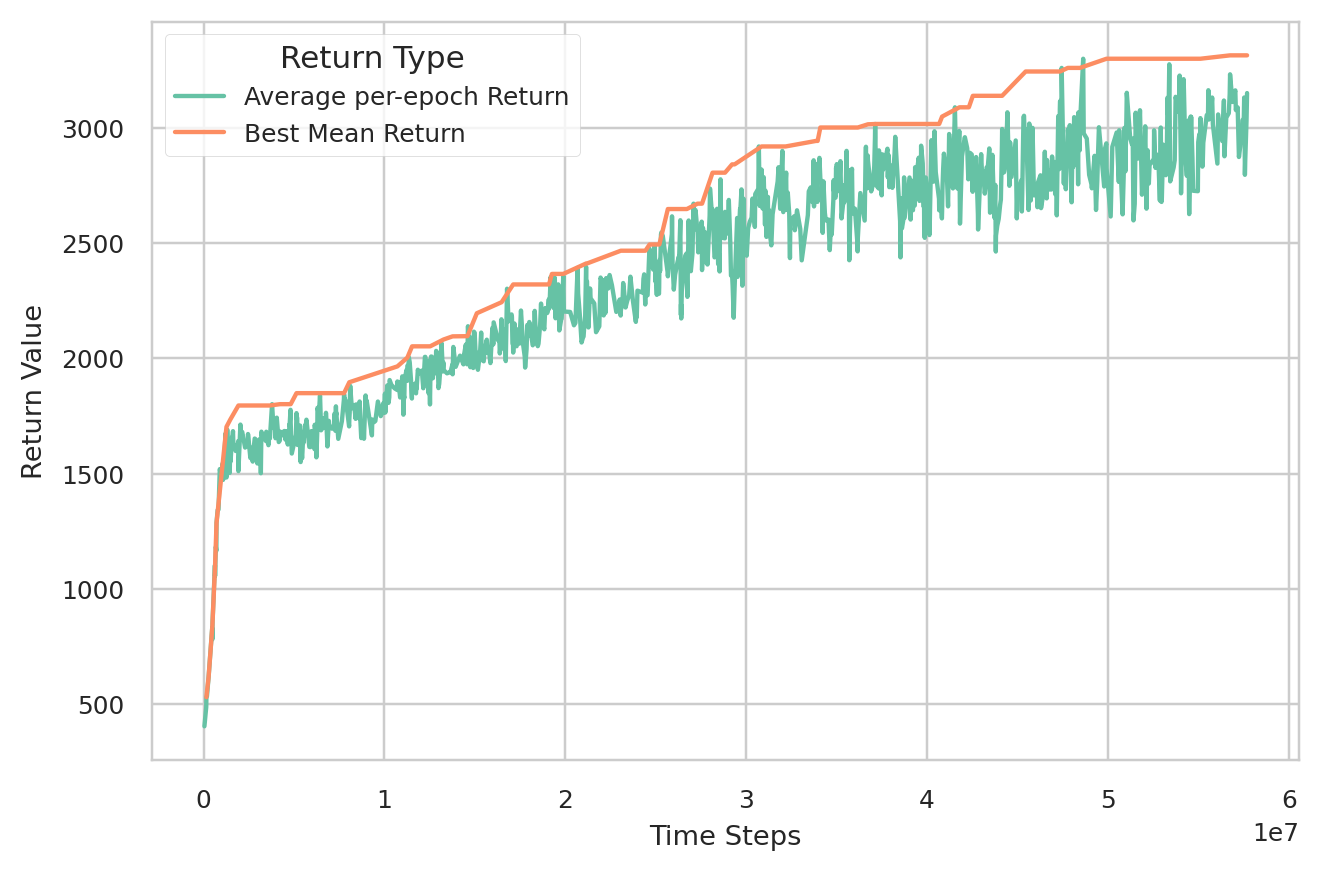

In [26]:
# Question 1: basic Q-learning performance
# =========================================
avg_r_df = pd.read_csv(
    osp.join('./data/hw3/q1',
            'run-q1_MsPacman-v0_03-10-2022_12-21-49-tag-'
            'Train_AverageReturn.csv')
)
_process_df(avg_r_df, name='Average per-epoch Return')
best_r_df = pd.read_csv(
    osp.join('./data/hw3/q1/',
             'run-q1_MsPacman-v0_03-10-2022_12-21-49-tag-'
             'Train_BestReturn.csv')
)
_process_df(best_r_df, name='Best Mean Return')

df = pd.merge(avg_r_df, best_r_df, how='left')
df = df.melt(
    id_vars='Time Steps',
    var_name='Return Type',
    value_name='Return Value'
)
df.dropna(axis=0, how='any', inplace=True)
display(df.head(5))

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Return Value',
    hue='Return Type',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q1.png', dpi=600)

,Time Steps,Average per-epoch Return,Algorithm,Seed
0,10001,-227.337677,Vanilla DQN,1
1,20001,-180.342789,Vanilla DQN,1
2,30001,-157.550919,Vanilla DQN,1
3,40001,-144.640320,Vanilla DQN,1
4,50001,-127.866776,Vanilla DQN,1


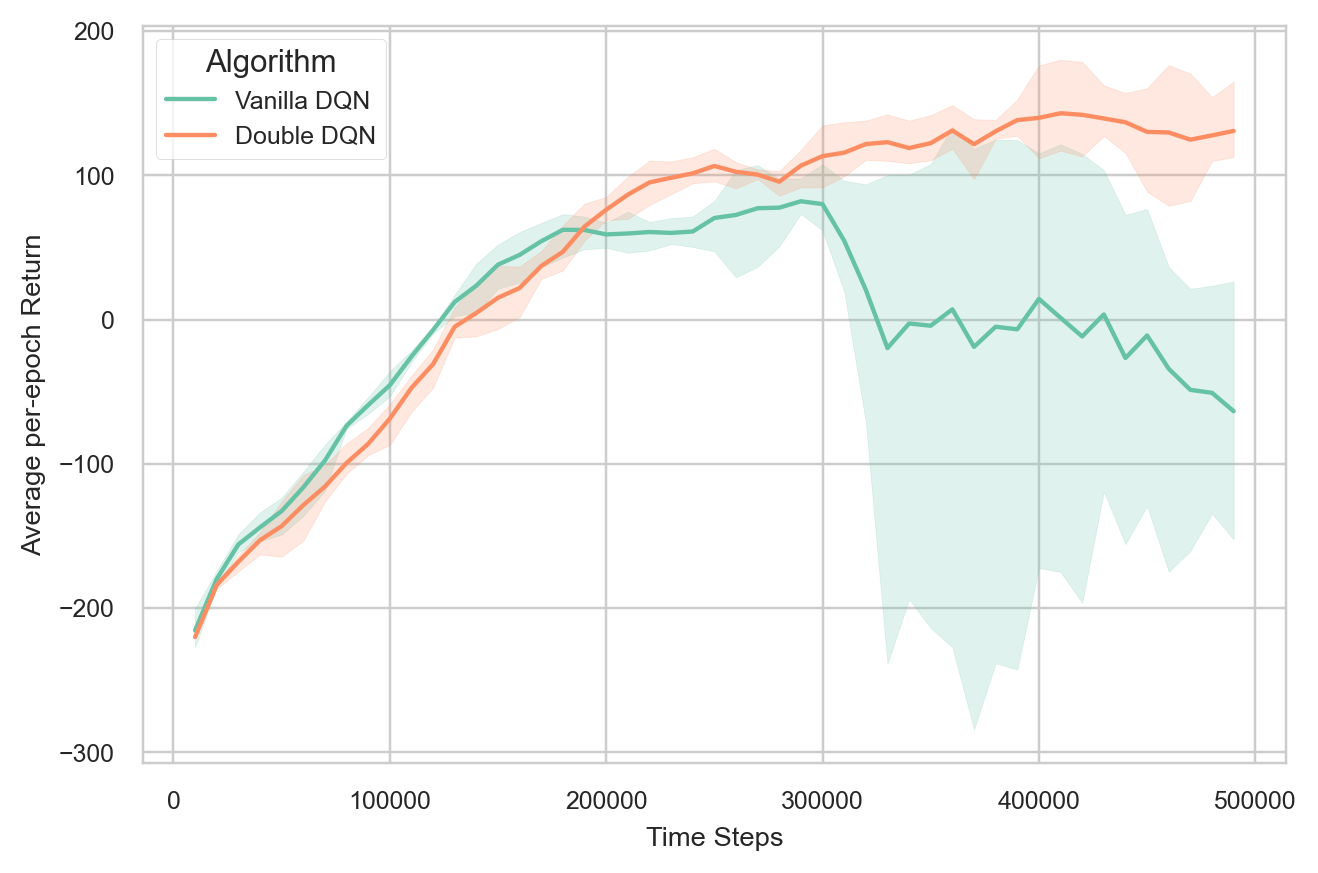

In [25]:
# Question 2: double Q-learning (DDQN)
# =========================================
vanilla_df = pd.DataFrame()
for i, filename in enumerate(os.listdir('./data/hw3/q2/vanilla')):
    df = pd.read_csv(
        osp.join('./data/hw3/q2/vanilla', filename)
    )
    _process_df(df, name='Average per-epoch Return')
    df['Algorithm'] = 'Vanilla DQN'
    df['Seed'] = i + 1
    vanilla_df = pd.concat([vanilla_df, df], axis=0)

double_df = pd.DataFrame()
for i, filename in enumerate(os.listdir('./data/hw3/q2/double')):
    df = pd.read_csv(
        osp.join('./data/hw3/q2/double', filename)
    )
    _process_df(df, name='Average per-epoch Return')
    df['Algorithm'] = 'Double DQN'
    df['Seed'] = i + 1
    double_df = pd.concat([double_df, df], axis=0)

df = pd.concat([vanilla_df, double_df], axis=0)
display(df.head(5))

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Average per-epoch Return',
    hue='Algorithm',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q2.png', dpi=600)


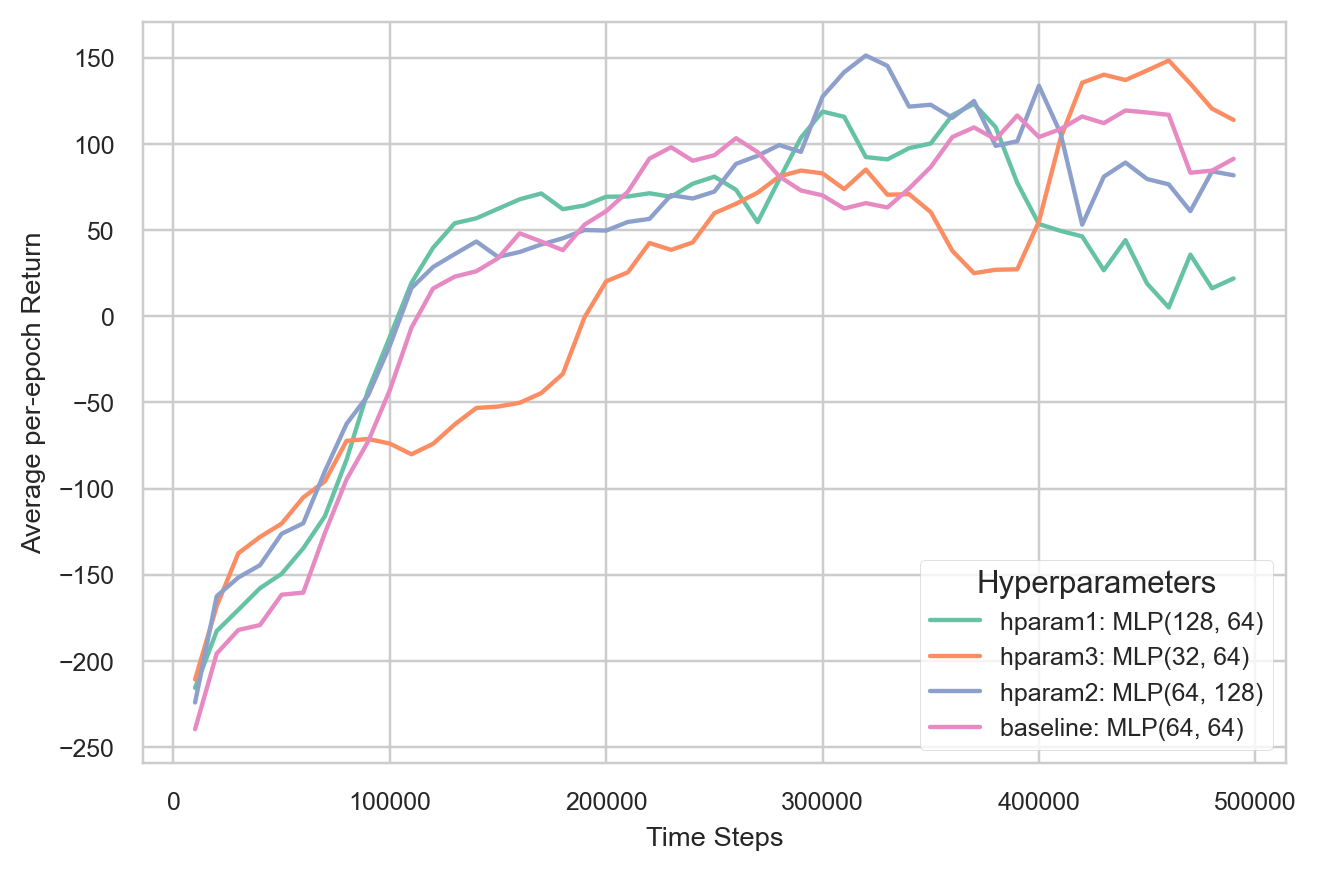

In [28]:
# Question 3
# =========================================
HPARAM_MAP = {
    'baseline': 'baseline: MLP(64, 64)',
    'hparam1': 'hparam1: MLP(128, 64)',
    'hparam2': 'hparam2: MLP(64, 128)',
    'hparam3': 'hparam3: MLP(32, 64)'
}
df = pd.DataFrame()
for i, filename in enumerate(os.listdir('data/hw3/q3')):
    if filename.split('.')[-1] != 'csv':
        continue

    sub_df = pd.read_csv(osp.join('data/hw3/q3', filename))
    _process_df(sub_df, 'Average per-epoch Return')
    hparam = filename.split('_')[1]
    sub_df['Hyperparameters'] = HPARAM_MAP[hparam]
    df = pd.concat([df, sub_df])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Average per-epoch Return',
    hue='Hyperparameters',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q3.png', dpi=600)

---

## Part 2: Actor-Critic

- <input type="checkbox" checked> Question 4: Sanity check with Cartpole-v0
  - <input type="checkbox" checked> Run and plot the evaluation average rewards of the four settings
  - <input type="checkbox" checked> The best settings should achieve a reward of 200
- <input type="checkbox" checked> Question 5: Run soft actor-critic with more difficult tasks

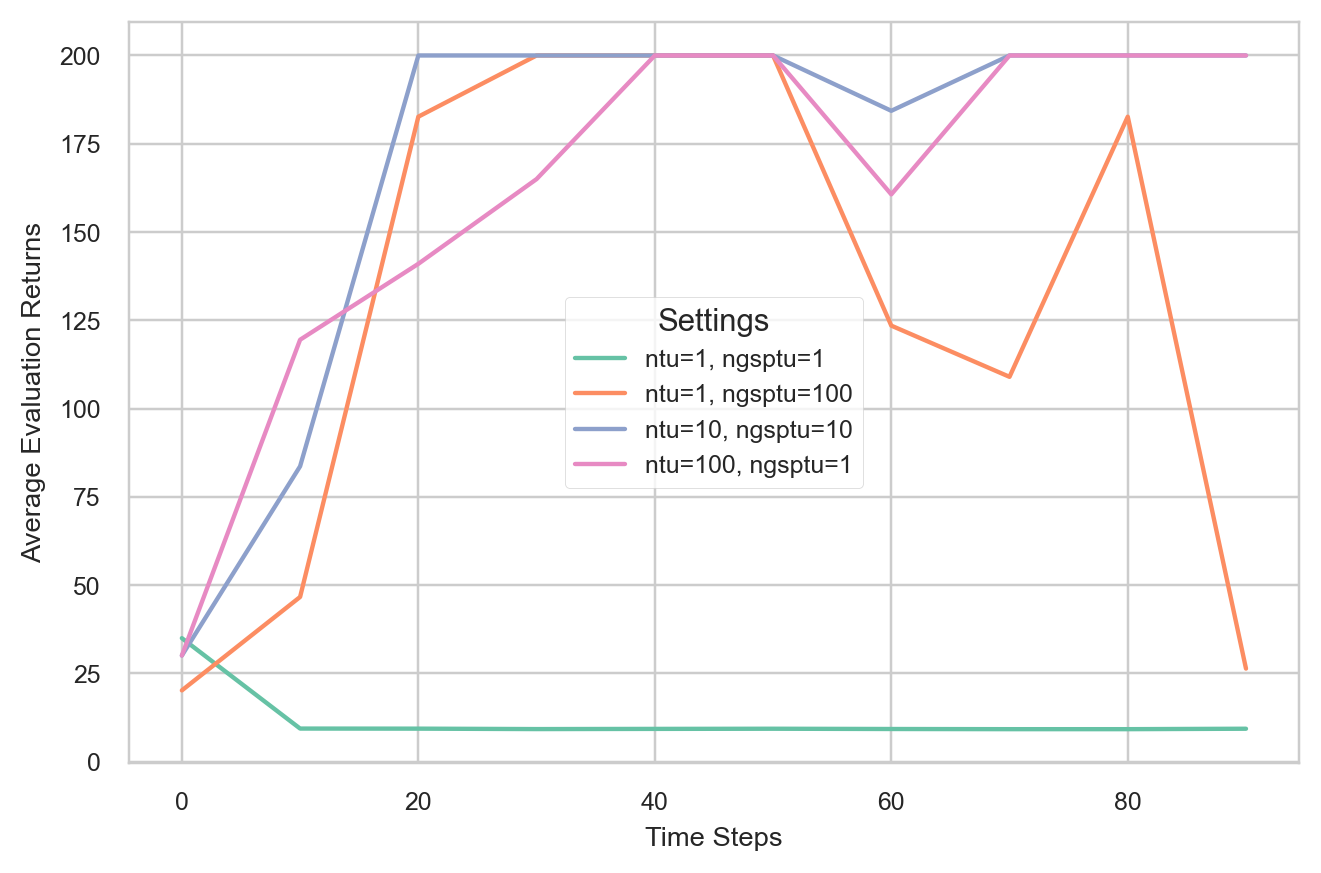

In [13]:
# Question 4
# =========================================
df = pd.DataFrame()
for i, filename in enumerate(os.listdir('data/hw3/q4')):
    if filename.split('.')[-1] != 'csv':
        continue

    sub_df = pd.read_csv(osp.join('data/hw3/q4', filename))
    _process_df(sub_df, 'Average Evaluation Returns')
    ntu, ngsptu = filename.split('_')[2:4]
    sub_df['Settings'] = f'ntu={ntu}, ngsptu={ngsptu}'
    df = pd.concat([df, sub_df])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Average Evaluation Returns',
    hue='Settings',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q4.png', dpi=600)

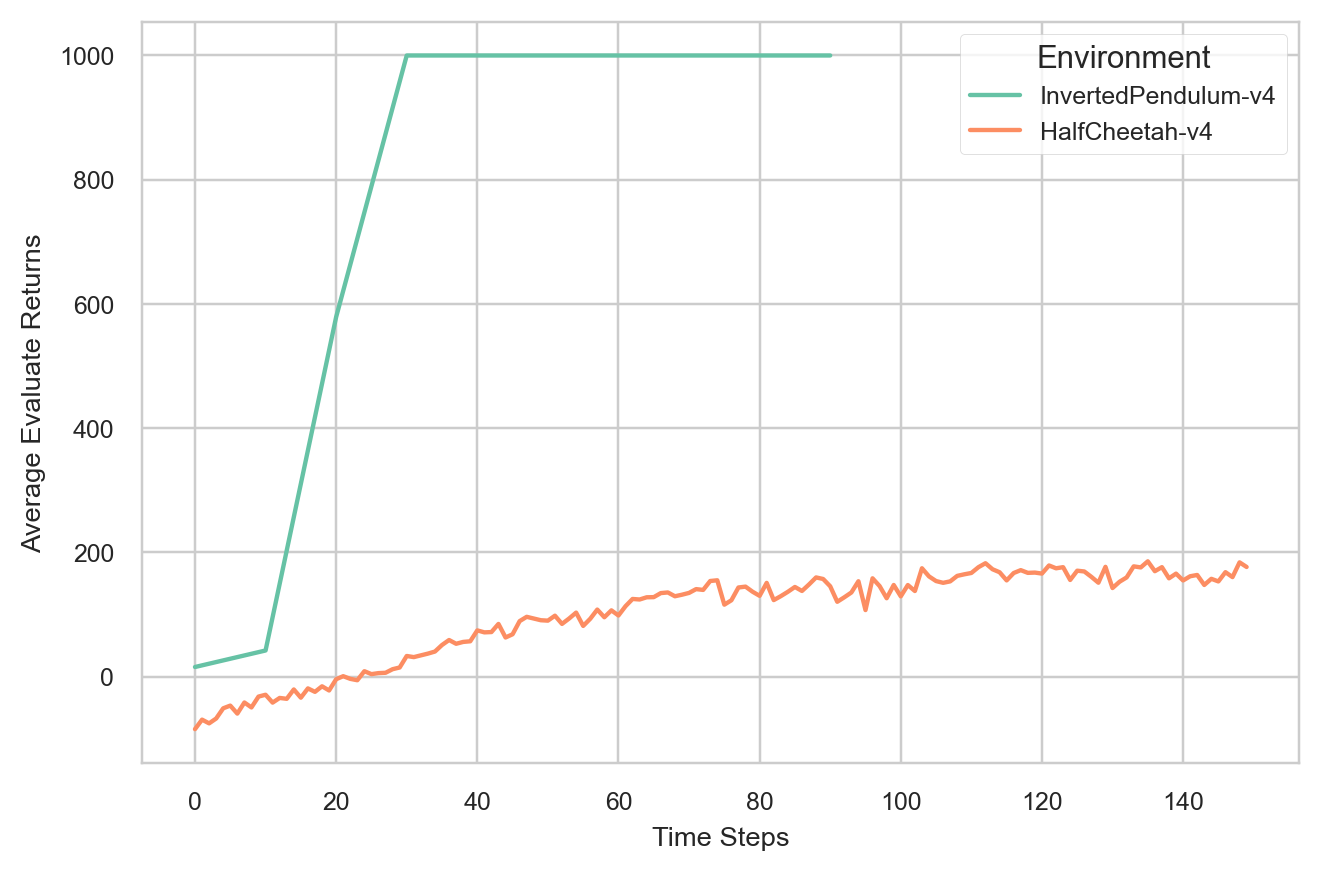

In [17]:
# Question 5
# =========================================
df = pd.DataFrame()
for i, filename in enumerate(os.listdir('data/hw3/q5')):
    if filename.split('.')[-1] != 'csv':
        continue
    env_name = filename.split('_')[3]
    sub_df = pd.read_csv(osp.join('data/hw3/q5', filename))
    _process_df(sub_df, 'Average Evaluate Returns')
    sub_df['Environment'] = env_name
    df = pd.concat([df, sub_df])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Average Evaluate Returns',
    hue='Environment',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q5.png', dpi=600)

---

## Part 3: Soft Actor-Critic

- <input type="checkbox" checked> Question 6: Run soft actor-critic more difficult tasks.

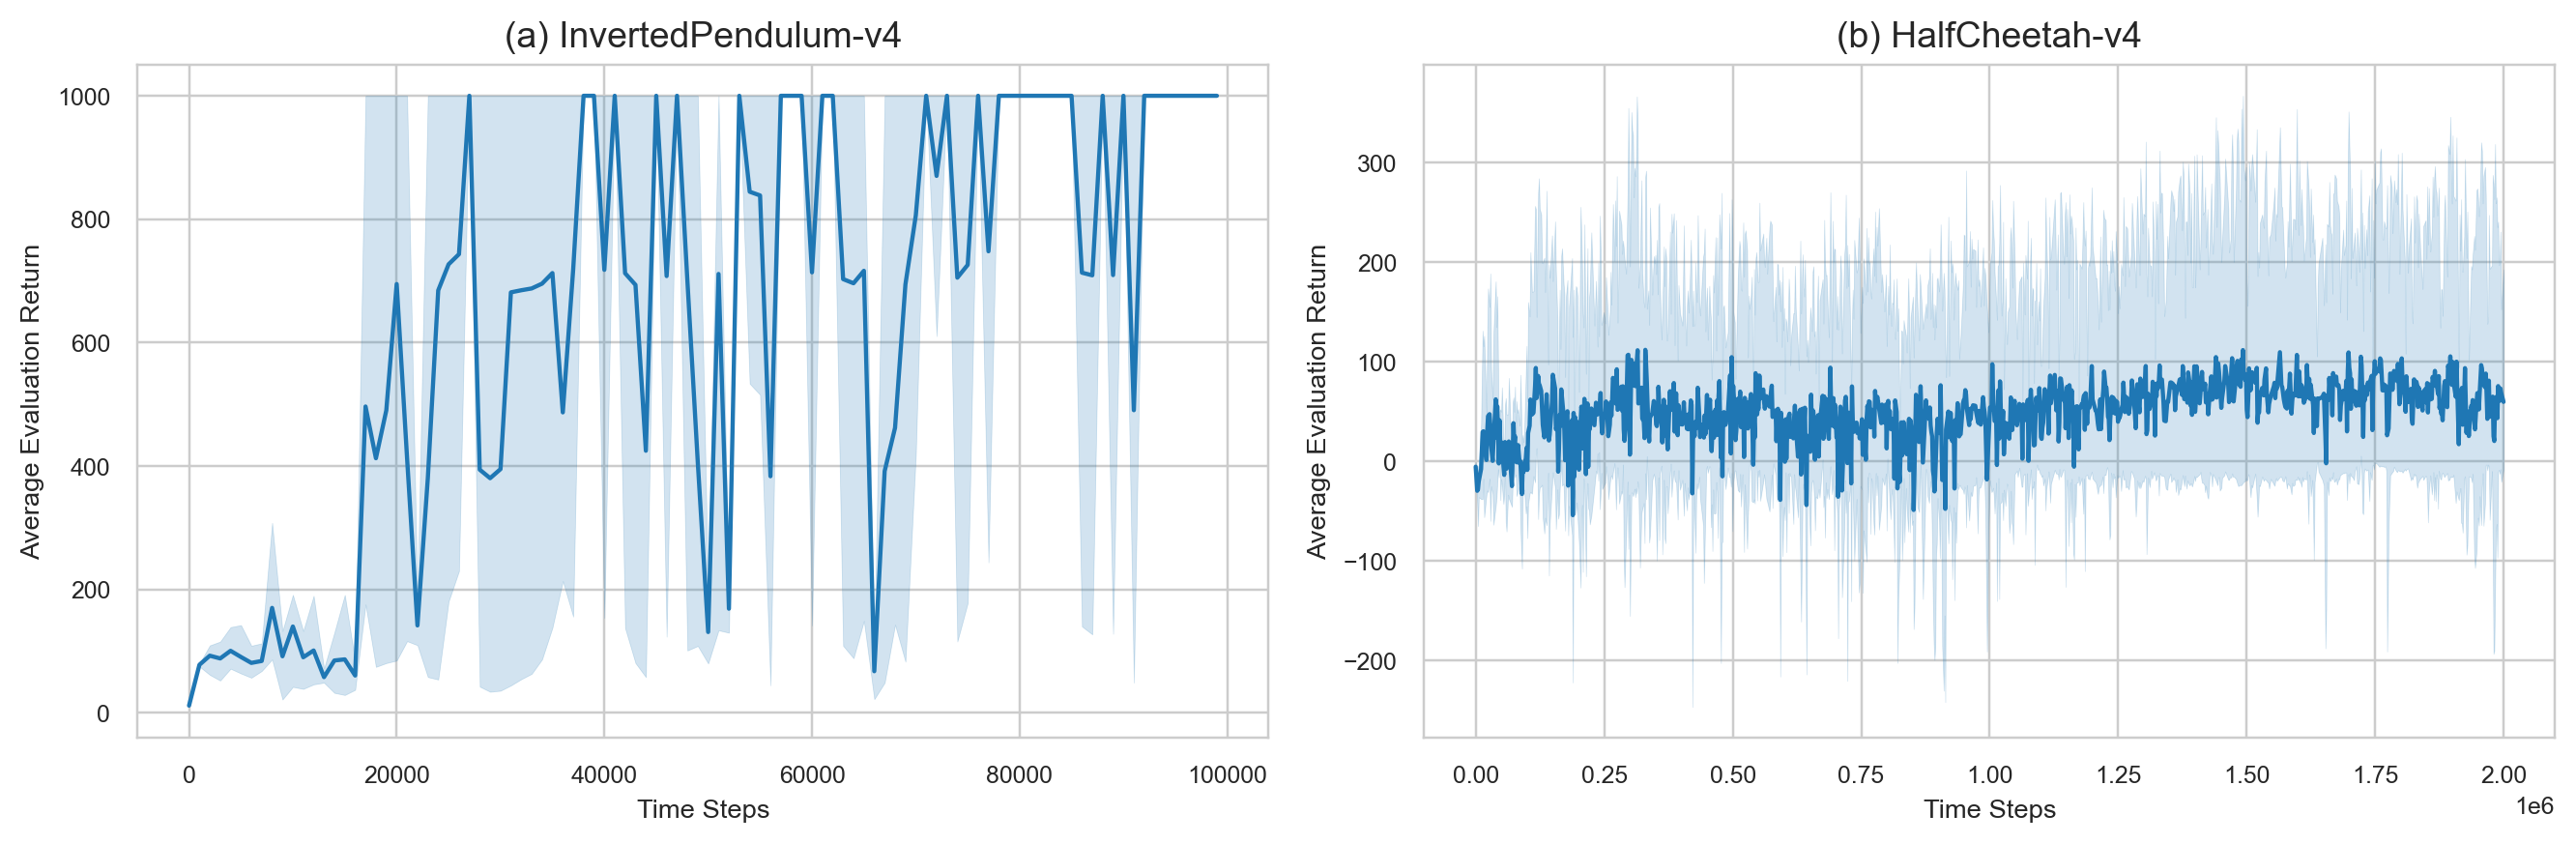

In [4]:
fig = plt.figure(figsize=(12, 4), dpi=224)

a_df = pd.DataFrame()  # for invertedpendulum
b_df = pd.DataFrame()  # for halfcheetah

for i, filename in enumerate(os.listdir('data/hw3/q6')):
    if filename.split('.')[-1] != 'csv':
        continue

    env_name = filename.split('_')[2]
    seed = int(filename.split('_')[4])

    df = pd.read_csv(osp.join('data/hw3/q6', filename))
    _process_df(df, 'Average Evaluation Return')
    df['env_name'] = env_name
    df['seed'] = seed
    if env_name == 'InvertedPendulum':
        a_df = pd.concat([a_df, df])
    if env_name == 'HalfCheetah':
        b_df = pd.concat([b_df, df])
    
ax = fig.add_subplot(1, 2, 1)
ax = sns.lineplot(
    data=a_df,
    x='Time Steps',
    y='Average Evaluation Return',
    ax=ax
)
ax.set_title('(a) InvertedPendulum-v4', fontsize=12)

ax = fig.add_subplot(1, 2, 2)
ax = sns.lineplot(
    data=b_df,
    x='Time Steps',
    y='Average Evaluation Return',
    ax=ax
)
ax.set_title('(b) HalfCheetah-v4', fontsize=12)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q6.png', dpi=600)
